In [0]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
%cd drive/My Drive/facial-keypoints-detection
!ls

/content/drive/My Drive/facial-keypoints-detection
IdLookupTable.csv	model_cnn.h5	      test.csv
model_attention_3M.h5	model_cnn.png	      test.zip
model_attention.h5	model_fnn.h5	      training.csv
model_attention.png	model_fnn.png	      training.zip
model_cnn_full_data.h5	SampleSubmission.csv


In [0]:
import os
print(os.listdir())

['SampleSubmission.csv', 'IdLookupTable.csv', 'training.zip', 'training.csv', 'test.csv', 'test.zip', 'model_cnn.h5', 'model_fnn.h5', 'model_attention.h5', 'model_attention_3M.h5', 'model_cnn_full_data.h5', 'model_fnn.png', 'model_cnn.png', 'model_attention.png']


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os

Train_Dir = 'training.csv'
Test_Dir = 'test.csv'
lookid_dir = 'IdLookupTable.csv'
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)
print(os.listdir())

train_data.isnull().any().value_counts()
train_data.fillna(method = 'ffill',inplace = True)
train_data.isnull().any().value_counts()

imag = []
for i in range(0,7049):
    img = train_data['Image'][i].split(' ')
    img = ['0' if x == '' else x for x in img]
    img = img
    # print(type(img))
    imag.append(img)

image_list = np.array(imag,dtype = 'float')
image_list = image_list/255.
X_train = image_list.reshape(-1,96,96,1)


training = train_data.drop('Image',axis = 1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]
    y = (y - 48) / 48
    y_train.append(y)
y_train = np.array(y_train,dtype = 'float')

['SampleSubmission.csv', 'IdLookupTable.csv', 'training.zip', 'training.csv', 'test.csv', 'test.zip', 'model_cnn.h5', 'model_fnn.h5', 'model_attention.h5', 'model_attention_3M.h5', 'model_cnn_full_data.h5', 'model_fnn.png', 'model_cnn.png', 'model_attention.png']


In [0]:
# print(X_train[10])
print(y_train[10])

[ 0.35896226 -0.2845283  -0.3999434  -0.29296226  0.22403774 -0.25922642
  0.46013208 -0.25922642 -0.28188679 -0.26766038 -0.49269811 -0.25922642
  0.12284906 -0.41101887  0.58662264 -0.41101887 -0.19756604 -0.45316981
 -0.65290566 -0.41943396 -0.0120566   0.0780566   0.19030189  0.49124528
 -0.29032075  0.47437736 -0.03188679  0.35958491 -0.03735849  0.70203774]


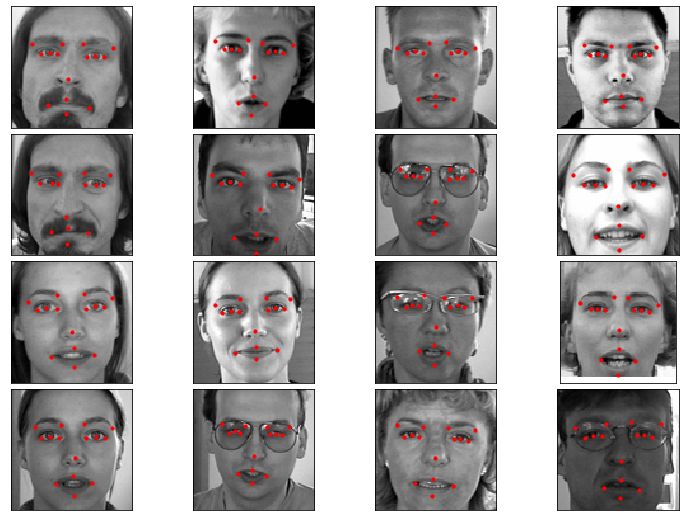

In [0]:
import matplotlib.pyplot as plt

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_train[i], y_train[i], axis)

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.layers import MaxPooling2D, Conv2D , Flatten, Dropout
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [0]:
def CNN():
    model = Sequential()

    model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same",activation="relu",input_shape=(96,96,1)))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(64, (3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Conv2D(32, (3,3),activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), border_mode="valid"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(500, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.1))

    model.add(Dense(30))

    model.summary()
    model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae','accuracy'])
    return(model)

model_cnn = CNN()





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid")`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 96, 96, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 23, 23, 32)       

In [0]:
hist_cnn = model_cnn.fit(X_train, y_train, nb_epoch=100,batch_size=128, validation_split=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.




Train on 6344 samples, validate on 705 samples
Epoch 1/100
6344/6344 [==============================] - 9s 1ms/step - loss: 0.1028 - mean_absolute_error: 0.2245 - acc: 0.1529 - val_loss: 0.0121 - val_mean_absolute_error: 0.0834 - val_acc: 0.2667
Epoch 2/100
6344/6344 [==============================] - 1s 214us/step - loss: 0.0223 - mean_absolute_error: 0.1143 - acc: 0.3537 - val_loss: 0.0075 - val_mean_absolute_error: 0.0639 - val_acc: 0.5163
Epoch 3/100
6344/6344 [==============================] - 1s 212us/step - loss: 0.0143 - mean_absolute_error: 0.0899 - acc: 0.4524 - val_loss: 0.0072 - val_mean_absolute_error: 0.0637 - val_acc: 0.5915
Epoch 4/100
6344/6344 [==============================] - 1s 213us/step - loss: 0.0111 - mean_absolute_error: 0.0788 - acc: 0.4801 - val_loss: 0.0061 - val_mean_absolute_error: 0.0571 - val_acc: 0.6128
Epoch 5/100
6344/6344 [==============================] - 1s 212us/step - loss: 0.0095 - mean_absolute_error: 0.0720 - acc: 0.5069 - val_loss: 0.0051 

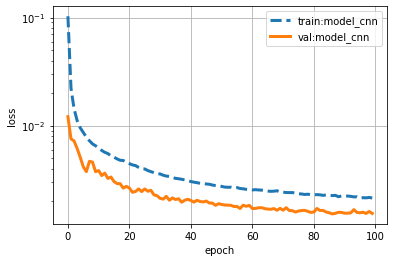

In [0]:
def plot_loss(hist,name,plt,RMSE_TF=False):
    loss = hist['loss']
    val_loss = hist['val_loss']
    if RMSE_TF:
        loss = np.sqrt(np.array(loss))*48 
        val_loss = np.sqrt(np.array(val_loss))*48 
        
    plt.plot(loss,"--",linewidth=3,label="train:"+name)
    plt.plot(val_loss,linewidth=3,label="val:"+name)

plot_loss(hist_cnn.history,"model_cnn",plt)
plt.legend()
plt.grid()
plt.yscale("log")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [0]:
from keras.models import load_model
# model_cnn.save('model_cnn_full_data(1-20).h5') 

model_cnn = load_model('model_cnn_full_data(1-20).h5')

In [0]:
timag = []
for i in range(0,1783):
    timg = test_data['Image'][i].split(' ')
    timg = ['0' if x == '' else x for x in timg]
    timag.append(timg)

timage_list = np.array(timag,dtype = 'float')
timage_list = timage_list/255.
X_test = timage_list.reshape(-1,96,96,1)

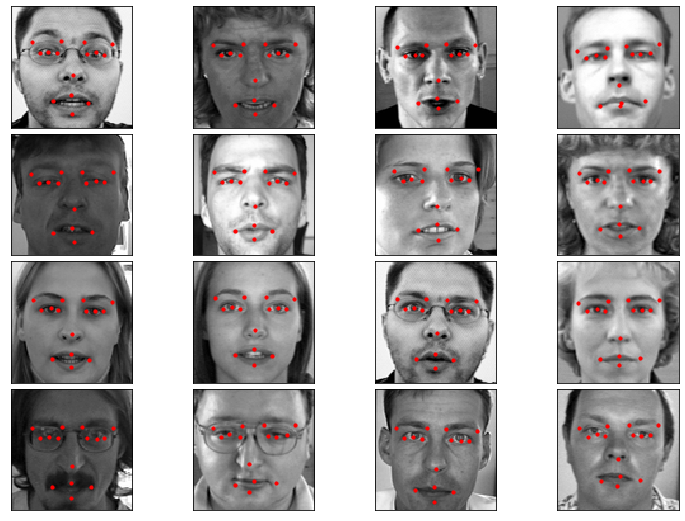

In [0]:
import matplotlib.pyplot as plt

pred = model_cnn.predict(X_test)

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], pred[i], axis)

plt.show()

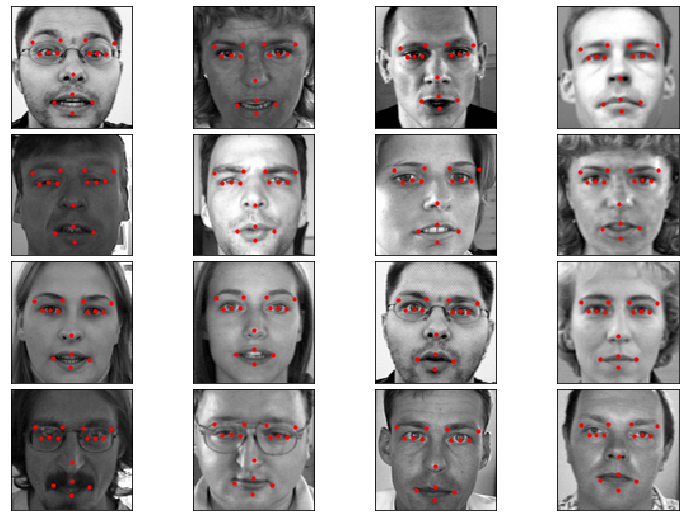

In [0]:
import matplotlib.pyplot as plt

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(16):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], y_test[i], axis)

plt.show()

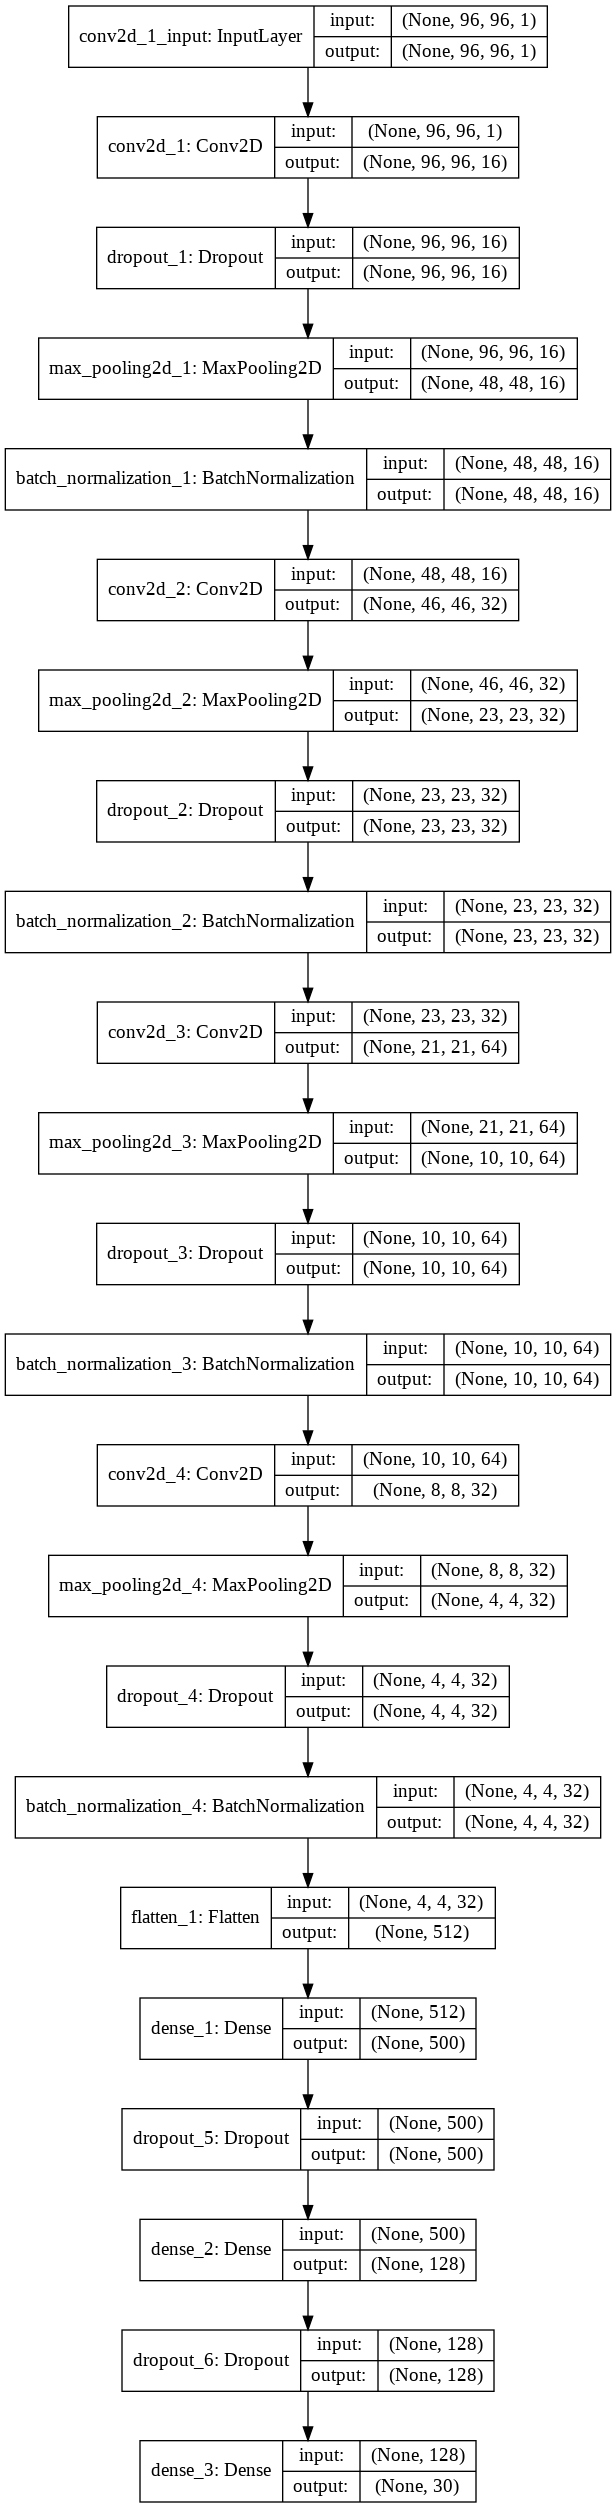

In [0]:
from keras.utils import plot_model
# from keras.utils.vis_utils import plot_model
plot_model(model_cnn, to_file='model_cnn.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='model_cnn.png')

In [0]:
import cv2

img = cv2.imread('img2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (96, 96))

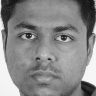

In [0]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

In [0]:
timage_list = np.array(img,dtype = 'float')
timage_list = timage_list/255.
X_test = timage_list.reshape(-1,96,96,1)

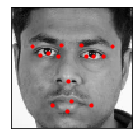

In [0]:
pred = model_cnn.predict(X_test)

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], pred[i], axis)

plt.show()

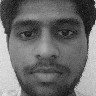

In [0]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('img7.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (96, 96))

cv2_imshow(img)

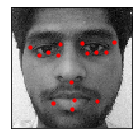

In [0]:
timage_list = np.array(img,dtype = 'float')
timage_list = timage_list/255.
X_test = timage_list.reshape(-1,96,96,1)

pred = model_cnn.predict(X_test)

def plot_sample(x, y, axis):
    img = x.reshape(96, 96)
    axis.imshow(img, cmap='gray')
    axis.scatter(y[0::2]*48+48, y[1::2]*48+48, marker='o', s=10, c='red')

fig = plt.figure(figsize=(10, 7))
fig.subplots_adjust(
    left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(1):
    axis = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    plot_sample(X_test[i], pred[i], axis)

plt.show()